<a href="https://colab.research.google.com/github/jacob-jones23/MAT-422/blob/main/Elements_Of_Linear_Algebra.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import sympy
import matplotlib.pyplot as plt
from matplotlib import colors
import math as mt
from numpy import linalg as LA

#**Numpy Arrays codes**

In [ ]:
# Create a 1D array
a = np.array([1,2,3,4])
print('a = ',a)

# Create an array of more than one dimension
b = np.array([[1,2],[4,5]])
print('b = ',b)

# The dimension of an array
print(b.ndim)

# Selecting the first column of a matrix (starts at 0)
col = b[:,0]
print(col)

# **1.2 Elements of Linear Algebra**

---
##**1.2.1 Linear Spaces**

**1.2.1.1 Linear Combinations:** A new vector constructed from a subset by multiplying each vector by a constant and adding the results.

**Definition 1.2.1 Linear subspace:** A linear subspace of *V* is a subset *U*⊆*V* that is closed under vector addition and scalar multiplication.

* For all **$u_{1}$,$u_{2}$** ∈ *U* and *α* ∈ ℝ, it means **$u_{1}$+$u_{2}$**∈U and α**$u_{1}$**∈U.


* A vector of zeros, **0**, is always in a linear subspace.




In [26]:
u1 = np.array([1,3])
u2 = np.array([2,4])
## example of vector addition
VA = u1+u2
print(VA, 'is in U')

##example of scalar multiplication
alpha = 3
SM = alpha*u1
print(SM, 'is in U')

[3 7] is in U
[3 9] is in U


**Definition 1.2.2 Span:** Let **$w_{1}$**,...,**$w_{m}$** ∈ *V*. Thus, span{**$w_{1}$**,...,**$w_{m}$**} is the set of all linear combinations of the **w**$_{j}$'s. That is,
\begin{align}
span({\mathbf{w}_{1},...,\mathbf{w}_{m}}) = ∑_{j=1}^m α_{j}\mathbf{w}_{j} : α_{1},...,α_{m} ∈ ℝ
\end{align}

* Every Span is a linear Subspace: Let *W* = span(**$w_{1}$**,...,**$w_{m}$**). Then *W* is a linear subspace.

**Definition 1.2.4 Column Space**: Let *A*∈ℝ$^{n*m}$ be an *n* 𝖷 *m* matrix with columns **$a_{1},...,a_{m}$**∈ℝ$^{n}$. The column space of A, denoted col(A), is the span of the columns of A, that is, col(A) = span(**$a_{1}$**,...,**$a_{m}$**)∈ℝ$^{n}$.

####**1.2.1.2 Linear Independence and Dimension**
**Definition 1.2.5 Linear Independence**: A list of vectors **$u_{1}$**,...,**$u_{m}$** is linearly independent if none of them can be written as a linear combination of the others.
* A list of vectors is called linearly dependent if it is not linearly independent.

**Lemma 1.2.6**: The vectors **u$_{1}$**,...,**u$_{m}$** are linearly independent if and only if

${\displaystyle \sum_{j=1}^{m}}$ α$_{j}$**u$_{j}$** = 0 ⇒ α$_{j}$ = 0, ∀**j**.


In [3]:

# Create matrix
A = np.array([[3,4,3,0],[1,2,3,0],[4,2,1,0]])
# Print the matrix
print("Matrix A : {}".format(A))
# the format method converts the array into a string of text

# Calculate the reduced row echelon form of matrix A
A_rref = sympy.Matrix(A).rref() # use the sympy.rref() method
print("Reduced Row Echelon Form: {}".format(A_rref))
print("The only solution we end up with is the trivial solution so this set of vectors are linearly independent")




Matrix A : [[3 4 3 0]
 [1 2 3 0]
 [4 2 1 0]]
Reduced Row Echelon Form: (Matrix([
[1, 0, 0, 0],
[0, 1, 0, 0],
[0, 0, 1, 0]]), (0, 1, 2))
The only solution we end up with is the trivial solution so this set of vectors are linearly independent


**Definition 1.2.7 Basis**: Let *U* be a linear subspace of *V*.
  * A basis of *U* is a list of vectors **$u_{1},...u_{m}$** in *U* that:
    (1) span *U*, that is *U* = span(**$u_{1},...u_{m}$**) and (2) are linearly independent.

**Theorem 1.2.8 Dimenson Theorem**: Let *U* be a linear subspace of *V*. Any basis of *U* always has the same number of elements. All bases of *U* have the same number of elements.
  * Elements refers to the dimension of *U* denoted by dim(*U*).

**Lemma 1.2.9 Characterization of Linearly Dependent Sets**: Let **$u_{1},...u_{m}$** be a linearly dependent list of vectors with linearly independent subset, **$u_{i}$,*i*** ϵ {1,...,*k*},*k<m*. Then there is an *i* > *k* such that...

(1) **$u_{i}$**∈ span(**$u_{1},...,u_{i-1}$**)

(2) span({**$u_{j}$** : *j* ∈ {1,...,*m*}}) = span({**$u_{j}$** : *j* ∈ {1,...,*m*}, *j* *i*})


In [6]:
# Basis example

# The Basis
v_1 = np.array([[1],[0]])
v_2 = np.array([[-1/mt.sqrt(2)],[1/mt.sqrt(2)]])

# Change of coordinate matrix
p = np.concatenate([v_1,v_2], axis=1) # np.concatenate joins a sequence of arrays along an existing axis
print(p)
p_inv = np.linalg.inv(p) # np.linalg.inv(p) finds the inverse matrix of p

# Coordinate of x in R^2
x = np.array([[2],[2]])

# New coordinate relative to basis B
x_B = p_inv @ x

print("the coordinate of vector x in basis B is", np.round(x_B,2))

[[ 1.         -0.70710678]
 [ 0.          0.70710678]]
the coordinate of vector x in basis B is [[4.  ]
 [2.83]]


##**1.2.2 Orthogonality**

The use of orthonormal bases can greatly simplify mathematical representations and reveal more insights of the underlying problems.

####**1.2.2.1 Orthonormal Bases**
**Definition 1.2.10 Norm and Inner Product**: ⟨**u, v**⟩ = **u** * **v** = ∑$^{n}_{i}$$u_{i}v_{i}$ and
||u|| = $\sqrt{∑^{n}_{i}u_{i}^{2}}$.




In [15]:
u = np.array([1,3])
v = np.array([2,4])

# Inner Product
ip = u[0]*v[0] + u[1]*v[1]
ip2 = np.dot(u,v) ##Alternate method to compute inner product is with np.dot
print('The inner product <u,v> equals', ip)
print('The same result is obtained by using the np.dot(u,v) method ', ip2)

# Norm
normU = mt.sqrt(u[0]**2 + u[1]**2) ## mt.sqrt() finds the square root of any number
normU2 = np.linalg.norm(u) ## Alternate method to compute norm
print('Norm of vector u equals', normU)
print('which is the same result as the np.linalg.norm(u) method ', normU2)


The inner product <u,v> equals 14
The same result is obtained by using the np.dot(u,v) method  14
Norm of vector u equals 3.1622776601683795
which is the same result as the np.linalg.norm(u) method  3.1622776601683795


**Definition 1.2.11 Orthonormal**: A list of vectors {**$u_{1},...u_{m}$**} is orthonormal if
  
  [1] The **$u_{i}$**'s are pairwise orthogonal
  
  [2] Each has norm 1, that is for all *i* and all j != i, ⟨**$u_{i}, u_{j}$**⟩ = 0, and ||**$u_{i}$**|| = 1.


In [17]:
#Example of a list of orthonormal vectors
u1 = np.array([1,0])
u2 = np.array([0,1])
print('The inner product equals', u1[0]*u2[0]+u1[1]*u2[1])
print('Norm for u1 equals',mt.sqrt(u1[0]**2 + u1[1]**2))
print('Norm for u2 equals',mt.sqrt(u2[0]**2 + u2[1]**2))
print('The norm for each ui equals 1')

The inner product equals 0
Norm for u1 equals 1.0
Norm for u2 equals 1.0
The norm for each ui equals 1


**Lemma 1.2.12** Let {**$u_{1}$**,...**$u_{m}$**} be an orthonormal list of vectors.

  [1] ||∑$^{m}_{j=1}$ $α_{j}$**$u_{j}$**||$^2$ = ∑$^{m}_{j=1}$ $α_{j}^{2}$ for any $α_{j}$ ∈ ℝ, *j* ∈ {1,...*m*}

  [2] {**$u_{1},...u_{m}$**} are linearly independent.

**Theorem 1.2.13 Orthonormal Basis Expansion**: Let **$q_{1},...,q_{m}$** be an orthonormal basis of 𝒰 and let **u** ∈ 𝒰. Then

**u** = ${\displaystyle \sum_{j=1}^{m}}$ ⟨**u,$q_{j}$**⟩**$q_{j}$**




####**1.2.2.2 Best Approximation Theorem**
We have a linear subspace 𝒰 ⊆ *V* and a vector **v** ∉ 𝒰. We want to find the vector **v** in 𝒰 that is closest to **v*** in the norm as in Figure 1.1, that is, we want to solve

${\displaystyle \min_{𝐕^{*} ∈ 𝒰}}$ ||**v*** - **v**||.


**Example 1.2.14:** Consider the two-dimensional case with a one-dimensional subspace, say 𝒰=span(**$u_{1}$**) with ||**$u_{1}$**|| = 1. The geometrical intuition of the best approximation theorem is demonstrated in Figure 1.1. The solution **v*** has the property that the difference **v** - **v*** makes a right angel with **$u_{1}$**, that is, it is orthogonal to it.

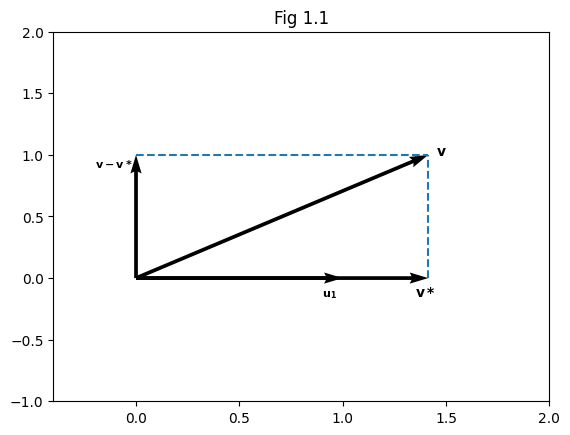

In [ ]:
#Figure 1.1
v = np.array([mt.sqrt(2),1])
vstar = np.array([mt.sqrt(2),0])
v_vstar = np.array([0,1])
u1 = np.array([1,0])
M = np.array([v,v_vstar,vstar,u1])

origin = np.array([[0, 0, 0,0],[0, 0, 0,0]]) # origin point

plt.quiver(*origin, M[:,0], M[:,1], color=['k','k','k','k'], angles='xy', scale_units='xy', scale=1)
plt.vlines(mt.sqrt(2), 0 ,1, linestyle="dashed")
plt.hlines(1, 0, mt.sqrt(2), linestyle="dashed")
plt.xlim(-0.4, 2)
plt.ylim(-1, 2)
plt.text(1.45,1, "$\mathbf{v}$", fontsize=10)
plt.text(-0.2,0.9, "$\mathbf{v-v*}$", fontsize=8)
plt.text(0.9,-0.15,"$\mathbf{u_1}$", fontsize=8)
plt.text(1.35,-0.15, "$\mathbf{v*}$", fontsize=10)
plt.title("Fig 1.1")
plt.show()

In [ ]:
u1 = np.array([1,0])
print(u1@v_vstar) #checking if <u1,v-v*> = 0
print(vstar, 'equals', (u1@v)*u1)  # proves that v* = <u1,v>u1

alpha = mt.sqrt(2)
print('||v-alpha*u1||^2 = ', np.linalg.norm(v-2*u1)**2 )
print('||v-v*||^2 + ||(alpha*-alpha)u1||^2',np.linalg.norm(v_vstar)**2 + np.linalg.norm((2-alpha)*u1)**2)

0
[1.41421356 0.        ] equals [1.41421356 0.        ]
||v-alpha*u1||^2 =  1.3431457505076199
||v-v*||^2 + ||(alpha*-alpha)u1||^2 1.3431457505076196


Letting **v*** = α&**$u_{1}$**, the geometrical condition above translates into

0 = ⟨**$u_{1}$, v-v***⟩ = ⟨**$u_{1}$, v-α*$u_{1}$**⟩ = ⟨**$u_{1}$, v**⟩ - α* ⟨**$u_{1}$,$u_{1}$**⟩ = ⟨**$u_{1}$,v**⟩-α*.

which implies **v*** = ⟨**$u_{1}$,v**⟩**$u_{1}$**.

By the Pythagorean theorem, for any α∈ℝ,

||**v-α$u_{1}$**||$^2$ = ||**v**- **v***+ **v***-**α$u_{1}$**||$^2$ =

||**v** - **v***+**(α*-α)$u_{1}$**||$^2$=||**v-v***||$^2$ + ||(**α*-α**)$u_{1}$||$^2$. Thus ||**v** -α**$u_{1}$**||$^2$ ≥ ||**v** - **v***||$^2$

This confirms the optimality of **v***.

**Definition 1.2.15 Orthogonal Projection:** Let 𝒰 ⊆ *V* be a linear subspace with orthonormal basis **$q_{1}$**,...,**$q_{m}$**. The orthogonal projection of **v** ∈ *V* on 𝒰 is defined as

  $𝒫_{𝒰}$**v** = ${\displaystyle \sum_{j=1}^{m}}$ ⟨**v,$q_{j}$**⟩**$q_{j}$**.


**Theorem 1.2.16 Best Approximation Theorem:** Let 𝒰 ⊆ *V* be a linear subspace with orthonormal basis **$q_{1}$,...$q_{m}$** and let **v** ∈ *V*. For any **u** ∈ 𝒰

||**v** - 𝒫$_{𝒰}$**v**|| ≤ ||**v-u**||.

Moreover, if **u** ∈ 𝒰 and the inequality above is an equality then **u** = 𝒫$_{𝒰}$**v**.

**Lemma 1.2.17 Pythagorean Theorem:** Let **u,v** ∈ *V* be orthogonal. Then ||**u** + **v**||$^2$ = ||**u**||$^2$ + ||**v**||$^2$.



In [22]:
## Lemma 1.2.17 example
u = np.array([1,2])
v = np.array([-2,1])
uv = np.linalg.norm(u+v)**2 ## ||u+v||^2
u2 = np.linalg.norm(u)**2 ## ||u||^2
v2 = np.linalg.norm(v)**2 ## ||v||^2
result = u2+v2 ## ||u|^2 + ||v||^2
print('||u+v||^2 = ', uv)
print('||u||^2 = ', u2)
print('||v||^2 = ', v2)
print('||u|^2 + ||v||^2 = ', result)
print('This is proof of the Pythagorean Theorem that, ||u+v||^2 = ||u||^2 + ||v||^2')


||u+v||^2 =  10.000000000000002
||u||^2 =  5.000000000000001
||v||^2 =  5.000000000000001
||u|^2 + ||v||^2 =  10.000000000000002
This is proof of the Pythagorean Theorem that, ||u+v||^2 = ||u||^2 + ||v||^2


**Lemma 1.2.18 Cauchy-Schwarz:** For any **u, v** ∈ *V*, |⟨**u**,**v**⟩| ≤ ||**u**||||**v**||.

In [25]:
## Caucy-Schwarz example
u = np.array([1,2])
v = np.array([-2,1])
uv = np.dot(u,v) ## calculates |<u,v>|
unorm = np.linalg.norm(u) ## calculates ||u||
vnorm = np.linalg.norm(v) ## calculates ||v||
uvR = unorm*vnorm ## calculates ||u||*||v||
print(uv)
print(uvR)
print("Proof that, |<u,v>| is less than or equal to ||u||||v||")

0
5.000000000000001
Proof that, |<u,v>| is less than or equal to ||u||||v||


**Lemma 1.2.19 Orthogonal Decomposition:** Let 𝒰 ⊆ *V* be a linear subspace with orthonormal basis **$q_{1}$,...$q_{m}$** and let **v** ∈ *V*. For any **u**∈𝒰, ⟨**v** -$𝒫_{𝒰}$**v**, **u**⟩ = 0. In particular, **v** can be decomposed as (**v** - $𝒫_{𝒰}$**v**) + $𝒫_{𝒰}$**v** where the two terms are orthogonal.

##**1.2.3 Gram-Schmidt Process**
The Gram-Schmidt algorithm is used to obtain an orthonormal basis.

**Theorem 1.2.20 Gram-Schmidt**: Let **$a_{1},...,a_{m}$** in ***R***$^n$ be linearly independent. Then there exist an orthonormal basis **$q_{1}$,...,$q_{m}$** of span(**$a_{1},...a_{m}$**).



##**1.2.4 Eigenvalues and Eigenvectors**
Eigenvalues and eigenvectors are key concepts in many applications.

**Definition 1.2.21 Eigenvalues and eigenvectors:** Let *A* ∈ ℝ$^{d𝚡d}$ be a square matrix. Then λ∈ℝ is an eigenvalue of *A* if there exists a nonzero vector **x** $\neq$ **0** such that

\begin{align}
A\mathbf{x} = λ\mathbf{x}
\end{align}

* The vector **x** is referred to as an eigenvector.

**Example 1.2.22 No Real Eigenvalues**: Set *d* = 2 and let

\begin{align}
A = \begin{pmatrix}
0 & -1 \\
1 & 0
\end{pmatrix}.
\end{align}

For λ to be an eigenvalue, there must be a nonzero eigenvector **x** = (*$x_{1}$*,*$x_{2}$*)$^{T}$ such that

\begin{align}
A\mathbf{x} = λ\mathbf{x}
\end{align}

which can also be interpreted as

\begin{align}
-x_{2}=λx_{1} \text{ and } x_{1} = λx_{2}.
\end{align}

Replacing these equations into each other, it must be that
\begin{align}
-x_{2}=λ^2x_{2} \text{ and } x_{1} = -λ^2x_{1}.
\end{align}

Since $x_{1}$,$x_{2}$ cannot both be 0, λ must satisfy the equation
\begin{align}
λ^2 = -1
\end{align}

for which there is no real solution.

In general, *A* ∈ℝ$^{dxd}$ has the most *d* distinct eigenvalues.

In [4]:
# Finding eigenvalues and eigenvectors
A = np.array([[-1,1],
              [0,-2]])
lam, u = LA.eig(A) # the LA.eig() function in NumPy calculates the eigenvalues and eigenvectors
print("eigenvalues =", np.round(lam,4))
print("eigenvectors =", np.round(u,4))

eigenvalues = [-1. -2.]
eigenvectors = [[ 1.     -0.7071]
 [ 0.      0.7071]]


In the code above,
LA.eig() is a function in NumPy that calcualtes the eigenvalues and eigenvevtors of a matrix. In this case we are using a 2x2 matrix called 'A'. LA.eig() returns tuple (set of elements). The first element of the tuple is an array that stores the eigenvalues which we assigned to 'lam'. The second element of the tuple is a 2-d array that stores the corresponding eigenvectors which is assigned to 'u'.  The np.round() method rounds an array to the given number of decimals. So when we write np.round(lam,4) it will round the array 'lam' to 4 decimals.

λ$_{1}$ = -1, **u$_{1}$** = [1, 0]$^{T}$

λ$_{2}$ = -2, **u$_{2}$** = [-0.7071, 0.7071]$^{T}$

**Lemma 1.2.23 Number of Eigenvalues**: Let *A* ∈ℝ$^{dxd}$ and let $λ_{1},...λ_{m}$ be distinct eigenvalues of *A* with corresponding nonzero eigenvectors x**$x_{1},...x_{m}$**. Then **$x_{1},...x_{m}$** are linearly independent. As a result, *m* ≤ *d*.

####**1.2.4.1 Diagonalization of Symmetric Matrices**

We will use the notation diag($λ_{1},...,λ_{d}$) for the diagonal matrix with diagonal entries $λ_{1},...λ_{d}$.

**Example 1.2.24 Diagonal (and Similar) Matrices):** Let *A* be similar to a matrix *D* = diag($λ_{1},...,λ_{d}$) with distinct diagonal entries, that is, there exists a nonsingular matrix *P* such that

\begin{align}
A=PDP^{-1}.
\end{align}

Let **$p_{1}$**,...,**$p_{d}$** be the columns of *P*. Then
\begin{align}
AP = PD
\end{align}
which impies
\begin{align}
Ap_{i}=λ_{i}p_{i}.
\end{align}

In [3]:
## Example of Diagonal (and Similar) Matrices
A = np.array([[-1,1],
              [0,-2]])
P = np.array([[1, -0.7071],
              [0, 0.7071]])
D = np.array([[-1, 0],
              [0, -2]])
AP = A@P
PD = P@D
print('AP = ',AP)
print('PD = ',PD)
print("Proof that AP = PD")

AP =  [[-1.      1.4142]
 [ 0.     -1.4142]]
PD =  [[-1.      1.4142]
 [ 0.     -1.4142]]
Proof that AP = PD


From the code above, we show how AP = PD. Matrix 'A' is our original matrix. Matrix 'D' is constructed with all of the eigenvalues from Matrix 'A'. Matrix D = diag($λ_{1},...,λ_{d}$).  Matrix 'P' is created with the eigenvectors formed from the eigenvalues. So in this case, λ$_{1}$= -1 is in the first column of row one in the diagonal matrix, so the corresponding eigenvector [1,0]$^{T}$ is the first column of matrix 'P'.

**Theorem 1.2.25** If *A* is symmetric, then any two eigenvectors from different eigenspaces are orthogonal.

**Theorem 1.2.26 The Spectral Theorem for Symmetric Matrices:** An *n* 𝖷 *n* symmetric matrix *A* has the following properties:
* *A* has *n* real eigenvalues, counting multiplicities.
* If λ is an eigenvalues of *A* with multiplicity *k*, then the eigenspace for λ is *k*-dimensional.
* The eigenspaces are mutually orthogonal, in the sense that eigenvectors corresponding to different eigenvalues are orthogonal.
* *A* is orthogonally diagonalizable

####**1.2.4.2 Constrained Optimization**
The following result is useful for many optimization problem.
**Theorem 1.2.27** Let *A* be *n* 𝖷 *n* symmetric matrix *A* with an orthogonal diagonalization *A* = *PDP$^{-1}$*. The columns of *P* are orthonormal eigenvectors **$v_{1},...,v_{n}$** of *A*. Assume that the diagonal of *D* are arranged so that $λ_{1}≤λ_{2},...≤λ_{n}$. Then
\begin{align}
min_{x\neq0} \frac{\mathbf{x}^{T}Ax}{\mathbf{x}^{T}x} = λ_{1}.
\end{align}

is achieved when **x** = **v$_{1}$** and

\begin{align}
max_{x\neq0} \frac{\mathbf{x}^{T}Ax}{\mathbf{x}^{T}x} = λ_{n}.
\end{align}

is achieved when **x** = **v$_{n}$**